<a href="https://colab.research.google.com/github/danthunguyenh/baitap/blob/main/ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls ../content/sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("../content/sample_data/mnist_train_small.csv")
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train = train.iloc[:, 1:].values.astype('float32')
labels = train.iloc[:, 0].values.astype('int32')

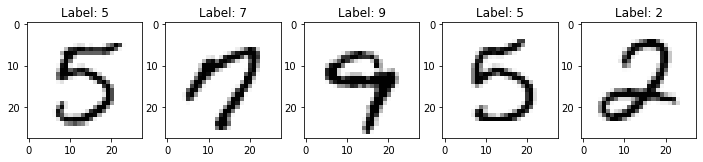

In [ ]:
fig = plt.figure(figsize=(12, 12))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    plt.title('Label: {label}'.format(label=labels[i]))
    plt.imshow(x_train[i].reshape(28, 28), cmap='Greys')

In [ ]:
CLASSES = 10
y_train = np.zeros([labels.shape[0], CLASSES])
for i in range(labels.shape[0]):
        y_train[i][labels[i]] = 5
y_train.view(type=np.matrix)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 5., 0., 0.],
        [0., 0., 0., ..., 0., 0., 5.],
        ...,
        [0., 0., 5., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 5.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
#chia dữ liệu thành 2 phần train và test. Test lấy 10%
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1) 
print('Train size: {train}, Test size: {test}'.format(train=x_train.shape[0], test=x_test.shape[0]))

Train size: 17999, Test size: 2000


In [ ]:
INPUT_LENGHT = x_train.shape[1] # 784 
HIDDEN_UNITS = 1000

Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
print('Input Weight shape: {shape}'.format(shape=Win.shape))

Input Weight shape: (784, 1000)


In [ ]:
def input_to_hidden(x):
    a = np.dot(x, Win)
    a = np.maximum(a, 0, a) # ReLU
    return a

In [ ]:
X = input_to_hidden(x_train)
Xt = np.transpose(X)
Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))
print('Output weights shape: {shape}'.format(shape=Wout.shape))

Output weights shape: (1000, 10)


In [ ]:
def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y

In [ ]:
y = predict(x_test)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
print('Accuracy: {:f}'.format(correct/total))

Accuracy: 0.941500
